## Creating a Virtual Age Based on Name Distribution

In this section, we explain how to calculate a virtual age for a name based on its distribution over the years. The idea is to use a **weighted average** of the birth years, where each year is weighted by the number of times the name was given.

### Objective

The goal is to assign a "virtual age" to a name, which reflects the distribution of this name over time. The more a name is given in a particular year, the more that year will influence the average age.

### Method

1. **Yearly weighting**: Each year is weighted by the number of occurrences of the name in that year.
2. **Weighted average of ages**: The virtual age is calculated by taking the difference between the current year and the year of birth, then weighting it by the number of times the name was given in that year.

The formula used to calculate the virtual age is:

Virtual Age = [ (current year - year of birth) × number of occurrences ] ---------------------------------------------------------- total number of occurrences


### Example

Let's take the example of the name **Jeanne**:
- In 1970, "Jeanne" was given 1000 times.
- In 2000, "Jeanne" was given 10 times.
- The current year is 2024.

The virtual age calculation would be:

Virtual Age = [(2024 - 1970) × 1000 + (2024 - 2000) × 10] / (1000 + 10)


Which gives:

Virtual Age = [54 × 1000 + 24 × 10] / 1010 = (54000 + 240) / 1010 ≈ 53.87


So, the virtual age of "Jeanne" would be **53.87 years**.

### Calculating in the Notebook

The calculation is performed in Python using a weighted average. We first filter the data for the specific name, then apply the formula described above to get the virtual age.

```python
# Example Python code to calculate the virtual age for a name
prenom = "JEANNE"
current_year = 2024  # Current year

# Filter the data for the name
df_prenom = df[df['PRENOM'] == prenom]

# Calculate the weighted age
df_prenom['AGE_PONDERED'] = (current_year - df_prenom['YOB']) * df_prenom['COUNT']

# Calculate the virtual age
age_fictif = df_prenom['AGE_PONDERED'].sum() / df_prenom['COUNT'].sum()

print(f"The virtual age for the name {prenom} is : {age_fictif:.2f} years")




### Step 1: Familiarizing with the Dataset and Cleaning

First, we familiarize ourselves with the dataset, **DS_PRENOMS_data.csv**, which was downloaded from the INSEE website. We clean and properly reformat the data, then display some basic statistics.


In [43]:
# Import necessary libraries
import pandas as pd

# Load the dataset (semicolon-separated)
file_path = '/kaggle/input/french-name-1900-2023/DS_PRENOMS_data.csv'
df = pd.read_csv(file_path, sep=';')

# Display the first few rows to ensure data is loaded correctly
df.head()

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values)

# Count unique values in each column
unique_counts = df.nunique()

# Display the number of unique entries per column
print("Number of unique entries per column:")
print(unique_counts)

# Drop the 'TIME_PERIOD' column since it has only one unique value (2023)
df = df.drop(columns=['TIME_PERIOD'])

# Display the first few rows after removing the 'TIME_PERIOD' column
df.head()

# Explanation of 'OBS_VALUE':
# The 'OBS_VALUE' column represents the number of times a given name was attributed in a specific department for a given birth year.

# Check if there are any remaining missing values after column adjustments
missing_values_after_cleaning = df.isnull().sum()

# Display missing values after cleaning
print("Missing values after cleaning:")
print(missing_values_after_cleaning)

# Drop any remaining rows with missing values if needed (if there are missing values)
df_cleaned = df.dropna()

# Verify that there are no missing values left
print("Missing values after dropping rows with NaN values:")
print(df_cleaned.isnull().sum())

# Display the cleaned dataset to confirm the changes
df_cleaned.head()


/tmp/ipykernel_36/969291231.py:6: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


Missing values per column:
YOB            0
SEX            0
PRENOM         2
GEO            0
GEO_OBJECT     0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64
Number of unique entries per column:
YOB              249
SEX                2
PRENOM         37766
GEO              199
GEO_OBJECT         3
TIME_PERIOD        1
OBS_VALUE       7350
dtype: int64
Missing values after cleaning:
YOB           0
SEX           0
PRENOM        2
GEO           0
GEO_OBJECT    0
OBS_VALUE     0
dtype: int64
Missing values after dropping rows with NaN values:
YOB           0
SEX           0
PRENOM        0
GEO           0
GEO_OBJECT    0
OBS_VALUE     0
dtype: int64


,YOB,SEX,PRENOM,GEO,GEO_OBJECT,OBS_VALUE
0,2010,2,CANDICE,25,DEP,"13,"
1,2018,2,CANDICE,89,DEP,"5,"
2,2015,2,CANDICE,28,DEP,"3,"
3,2005,2,CANDICE,40,DEP,"10,"
4,2010,2,CANDICE,41,DEP,"4,"


In [44]:
# Remove the 'TIME_PERIOD' column since it's not useful
df = df.drop(columns=['TIME_PERIOD'])

# Convert 'SEX' column to a more understandable format
# 1 for Male, 2 for Female
df['SEX'] = df['SEX'].replace({1: 'Male', 2: 'Female'})

# Count the occurrences of each 'PRENOM' by 'SEX'
# This counts the number of rows for each combination of 'SEX' and 'PRENOM'
grouped_df = df.groupby(['SEX', 'PRENOM']).size().reset_index(name='COUNT')

# Separate the data for males and females
top_boys = grouped_df[grouped_df['SEX'] == 'Male'].sort_values(by='COUNT', ascending=False).head(5)
top_girls = grouped_df[grouped_df['SEX'] == 'Female'].sort_values(by='COUNT', ascending=False).head(5)

# Display the top 5 boys names
print("Top 5 Boys Names in France since 1900:")
print(top_boys[['PRENOM', 'COUNT']])

# Display the top 5 girls names
print("Top 5 Girls Names in France since 1900:")
print(top_girls[['PRENOM', 'COUNT']])


/tmp/ipykernel_36/1723127552.py:6: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


Top 5 Boys Names in France since 1900:
              PRENOM  COUNT
35631         PIERRE  11539
35814  PRENOMS_RARES  11314
35448           PAUL  11110
29629           JEAN  10943
32207        LOUIS_1  10534
Top 5 Girls Names in France since 1900:
              PRENOM  COUNT
13086          MARIE  11672
17029  PRENOMS_RARES  11588
7608        HELENE_1   9895
8748          JEANNE   9488
1465            ANNE   9372


In [54]:
# Count the total number of boys and girls in the dataset
boys_count = len(df[df['SEX'] == 'Male'])
girls_count = len(df[df['SEX'] == 'Female'])

print(f"Number of boys: {boys_count}")
print(f"Number of girls: {girls_count}")

# Count the occurrences of each 'PRENOM' by 'SEX'
grouped_df = df.groupby(['SEX', 'PRENOM']).size().reset_index(name='COUNT')

# Filter out 'PRENOMS_RARES' and remove potential suffixes (like _1)
grouped_df_filtered = grouped_df[grouped_df['PRENOM'] != 'PRENOMS_RARES']
grouped_df_filtered['PRENOM'] = grouped_df_filtered['PRENOM'].str.replace(r'_\d+', '', regex=True)

# Recount the occurrences after filtering and removing suffixes
grouped_df_final = grouped_df_filtered.groupby(['SEX', 'PRENOM']).agg({'COUNT': 'sum'}).reset_index()

# Get the top 10 boys and girls names
top_boys = grouped_df_final[grouped_df_final['SEX'] == 'Male'].sort_values(by='COUNT', ascending=False).head(10)
top_girls = grouped_df_final[grouped_df_final['SEX'] == 'Female'].sort_values(by='COUNT', ascending=False).head(10)

# Display the top 10 boys names
print("Top 10 Boys Names in France since 1900:")
print(top_boys[['PRENOM', 'COUNT']])

# Display the top 10 girls names
print("Top 10 Girls Names in France since 1900:")
print(top_girls[['PRENOM', 'COUNT']])


/tmp/ipykernel_36/858690397.py:6: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


Number of boys: 2118819
Number of girls: 2444444
Top 10 Boys Names in France since 1900:
         PRENOM  COUNT
32258    PIERRE  11539
32081      PAUL  11110
26801      JEAN  10943
29033     LOUIS  10547
20832   ANTOINE  10170
24724  FRANCOIS  10148
22284   CHARLES  10090
24821   GABRIEL   9765
29754      MARC   9181
27403    JOSEPH   8923
Top 10 Girls Names in France since 1900:
         PRENOM  COUNT
11595     MARIE  11672
6813     HELENE   9928
7858     JEANNE   9488
1250       ANNE   9372
543       ALICE   9348
10562     LUCIE   9058
3379     CLAIRE   9009
4691      ELISE   8987
2874     CECILE   8839
8225   JULIETTE   8496


/tmp/ipykernel_36/858690397.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df_filtered['PRENOM'] = grouped_df_filtered['PRENOM'].str.replace(r'_\d+', '', regex=True)


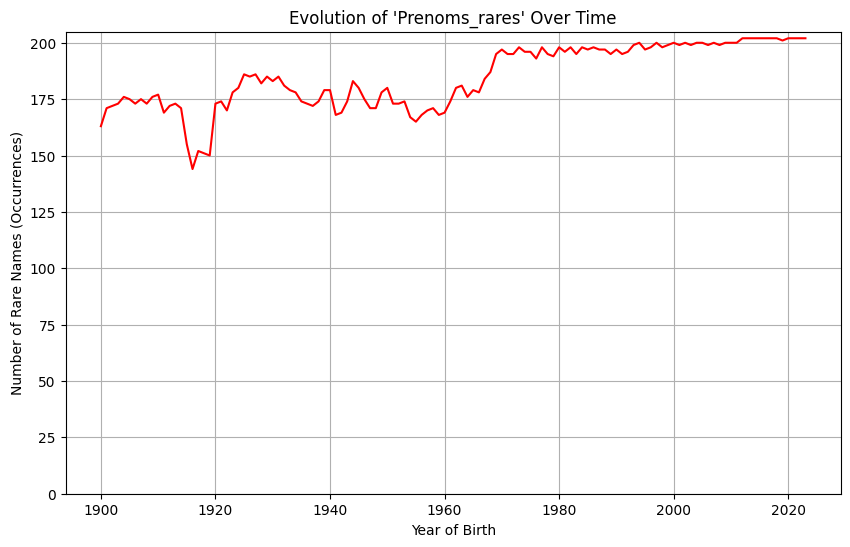

In [55]:
# Filter data to only include rows where the prenom is 'PRENOMS_RARES'
prenoms_rares_df = df[df['PRENOM'] == 'PRENOMS_RARES']

# Remove rows where YOB is 'XXXX'
prenoms_rares_df = prenoms_rares_df[prenoms_rares_df['YOB'] != 'XXXX']

# Convert YOB to numeric (in case it's not already)
prenoms_rares_df['YOB'] = pd.to_numeric(prenoms_rares_df['YOB'])

# Group by year of birth (YOB) and count the occurrences of rare names per year
prenoms_rares_by_year = prenoms_rares_df.groupby('YOB').size().reset_index(name='COUNT')

# Plot the evolution of rare names over time with y-axis starting at 0
plt.figure(figsize=(10, 6))
plt.plot(prenoms_rares_by_year['YOB'], prenoms_rares_by_year['COUNT'], color='red')
plt.title("Evolution of 'Prenoms_rares' Over Time")
plt.xlabel("Year of Birth")
plt.ylabel("Number of Rare Names (Occurrences)")
plt.ylim(0)  # Fix y-axis to start at 0
plt.grid(True)
plt.show()


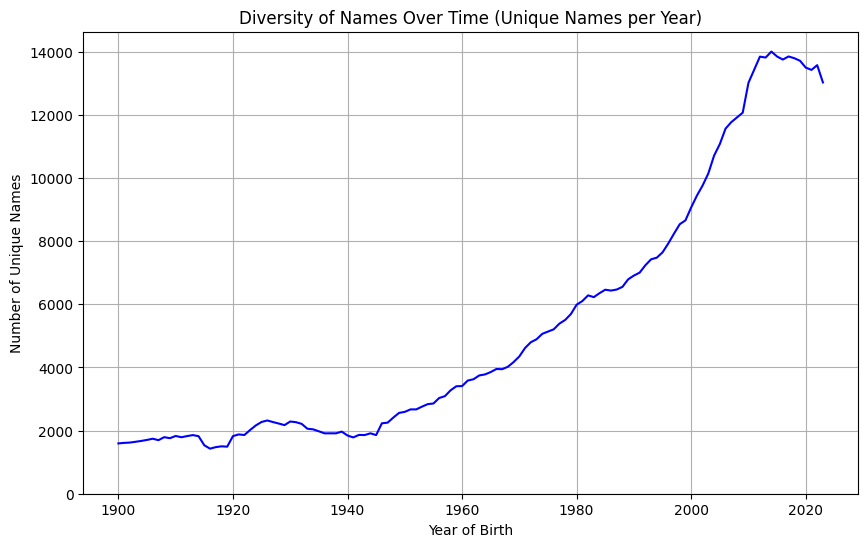

In [56]:
# Remove 'PRENOMS_RARES' from the dataset
df_without_rare = df[df['PRENOM'] != 'PRENOMS_RARES']

# Remove rows where YOB is 'XXXX'
df_without_rare = df_without_rare[df_without_rare['YOB'] != 'XXXX']

# Convert YOB to numeric (in case it's not already)
df_without_rare['YOB'] = pd.to_numeric(df_without_rare['YOB'])

# Count the number of unique names per year
diversity_per_year = df_without_rare.groupby('YOB')['PRENOM'].nunique().reset_index(name='UNIQUE_PRENOMS')

# Plot the diversity of names over time with y-axis starting at 0
plt.figure(figsize=(10, 6))
plt.plot(diversity_per_year['YOB'], diversity_per_year['UNIQUE_PRENOMS'], color='blue')
plt.title("Diversity of Names Over Time (Unique Names per Year)")
plt.xlabel("Year of Birth")
plt.ylabel("Number of Unique Names")
plt.ylim(0)  # Fix y-axis to start at 0
plt.grid(True)
plt.show()


### Step 2: Testing the Formula on a Few Names and Exporting the Top 100

In the second step, we test the formula on a few names and then export the top 100 male and female names into a new CSV file with their respective **mean virtual age** (file available for download).


In [68]:
import pandas as pd

# List of names to analyze
prenoms_a_analyser = ['Jennifer', 'Emilie_1', 'Didier', 'Alain', 
                      'James', 'Stephane_1', 'Guillaume', 'Jennyfer']

# Function to calculate the mean virtual age for a specific name
def calculer_age_fictif(prenom):
    # Filter the dataset for the specific name
    df_prenom = df[df['PRENOM'].str.lower() == prenom.lower()]
    
    # If the name is not found, return None
    if df_prenom.empty:
        return None
    
    # Drop the 'OBS_VALUE' column if it exists (optional)
    df_prenom = df_prenom.drop(columns=['OBS_VALUE'], errors='ignore')
    
    # Group data by year of birth (YOB) and name, then count occurrences
    df_grouped = df_prenom.groupby('YOB').size().reset_index(name='COUNT')
    
    # Convert 'YOB' to numeric for calculation purposes
    df_grouped['YOB'] = pd.to_numeric(df_grouped['YOB'], errors='coerce')
    
    # Calculate the mean virtual age using occurrences and birth years
    age_fictif = ((current_year - df_grouped['YOB']) * df_grouped['COUNT']).sum() / df_grouped['COUNT'].sum()
    
    # Return the rounded mean virtual age
    return round(age_fictif, 2)

# Calculate the mean virtual age for each name and display the results
for prenom in prenoms_a_analyser:
    age_fictif = calculer_age_fictif(prenom)
    
    if age_fictif is not None:
        print(f"The mean virtual age for the name {prenom} is: {age_fictif:.2f} years")
    else:
        print(f"The name {prenom} was not found in the dataset")


The mean virtual age for the name Jennifer is: 35.31 years
The mean virtual age for the name Emilie_1 is: 55.36 years
The mean virtual age for the name Didier is: 62.91 years
The mean virtual age for the name Alain is: 65.61 years
The mean virtual age for the name James is: 51.82 years
The mean virtual age for the name Stephane_1 is: 21.84 years
The mean virtual age for the name Guillaume is: 46.78 years
The mean virtual age for the name Jennyfer is: 31.44 years


In [70]:
import pandas as pd

# Current year
current_year = 2024

# Convert 'YOB' to numeric for calculations
df['YOB'] = pd.to_numeric(df['YOB'], errors='coerce')

# Filter valid data where 'YOB' is an integer
df = df.dropna(subset=['YOB'])

# Check the first few rows of the dataset after cleaning
print("First few rows after cleaning the data:")
print(df.head())

# Calculate the top 100 names for each gender using 'Male' and 'Female' instead of 1 and 2
top_100_boys = df[df['SEX'] == 'Male'].groupby('PRENOM').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False).head(100)
top_100_girls = df[df['SEX'] == 'Female'].groupby('PRENOM').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False).head(100)

# Check the top 5 boys' names after grouping
print("\nTop 5 boys' names after grouping:")
print(top_100_boys.head())

# Check the top 5 girls' names after grouping
print("\nTop 5 girls' names after grouping:")
print(top_100_girls.head())

# Function to calculate the mean virtual age
def calculer_age_fictif(prenom, sexe):
    df_prenom = df[(df['PRENOM'] == prenom) & (df['SEX'] == sexe)]
    df_grouped = df_prenom.groupby('YOB').size().reset_index(name='COUNT')
    age_fictif = ((current_year - df_grouped['YOB']) * df_grouped['COUNT']).sum() / df_grouped['COUNT'].sum()
    return age_fictif

# Add the 'AGE_FICTIF' column for boys
top_100_boys['AGE_FICTIF'] = top_100_boys['PRENOM'].apply(lambda prenom: calculer_age_fictif(prenom, 'Male'))

# Add the 'AGE_FICTIF' column for girls
top_100_girls['AGE_FICTIF'] = top_100_girls['PRENOM'].apply(lambda prenom: calculer_age_fictif(prenom, 'Female'))

# Check the top 5 boys' names with their mean virtual age
print("\nTop 5 boys' names with mean virtual age:")
print(top_100_boys.head())

# Check the top 5 girls' names with their mean virtual age
print("\nTop 5 girls' names with mean virtual age:")
print(top_100_girls.head())

# Merge the two datasets (boys and girls) into one table
top_100_combined = pd.concat([top_100_boys, top_100_girls])

# Add a 'SEX' column to identify gender
top_100_boys['SEX'] = 'Male'
top_100_girls['SEX'] = 'Female'

# Save the result to a CSV file
top_100_combined.to_csv('top_100_names_with_virtual_age.csv', index=False)

print("CSV file 'top_100_names_with_virtual_age.csv' successfully created.")

First few rows after cleaning the data:
      YOB     SEX   PRENOM GEO GEO_OBJECT
0  2010.0  Female  CANDICE  25        DEP
1  2018.0  Female  CANDICE  89        DEP
2  2015.0  Female  CANDICE  28        DEP
3  2005.0  Female  CANDICE  40        DEP
4  2010.0  Female  CANDICE  41        DEP

Top 5 boys' names after grouping:
              PRENOM  COUNT
13024         PIERRE  11539
13193  PRENOMS_RARES  11314
12867           PAUL  11110
7391            JEAN  10943
9813         LOUIS_1  10534

Top 5 girls' names after grouping:
              PRENOM  COUNT
12415          MARIE  11672
16133  PRENOMS_RARES  11588
7185        HELENE_1   9895
8277          JEANNE   9488
1395            ANNE   9372

Top 5 boys' names with mean virtual age:
              PRENOM  COUNT  AGE_FICTIF
13024         PIERRE  11539   64.042985
13193  PRENOMS_RARES  11314   59.783631
12867           PAUL  11110   63.018902
7391            JEAN  10943   65.890615
9813         LOUIS_1  10534   63.713404

Top 5 girls' names